# Тетрадка посвящена применению классических моделей к собранному PCA-transformed датасету 
# План исследования:
### Модели:
- Baseline Logreg
- Desision tree
- Random forest
- XGBoost classifier
### Метрики:
- Accuracy
- F1 Score


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from xgboost import XGBClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import numpy as np


In [2]:
df = pd.read_pickle(r"C:\Users\User\Documents\large datasets\classic_data.df")
y = df['target']
df.drop('target',axis=1,inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

In [8]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['none','l2']
}
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_logreg = grid_search.best_estimator_

c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been de

In [10]:
pred_logreg= best_logreg.predict(X_test)
f1_score(y_pred,y_test)

0.7168696936138796

In [18]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

dt = DecisionTreeClassifier()
grid_search_tree = GridSearchCV(dt, param_grid, cv=5, scoring='f1',n_jobs=3)
grid_search_tree.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=3,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [19]:
best_tree = grid_search_tree.best_estimator_
y_pred = best_tree.predict(X_test)
best_tree.score(X_test,y_test)

0.9580007650133877

In [5]:
from joblib import dump, load

In [22]:
dump(best_tree, "tree.joblib")

['tree.joblib']

In [3]:
param_grid = {
    'n_estimators': [25,50,100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,3,5],
    'min_samples_split': [2, 5, 10]
}
rf = RandomForestClassifier()
grid_search_forest = GridSearchCV(rf, param_grid, cv=5, scoring='f1',n_jobs=-1)
grid_search_forest.fit(X_train, y_train)
best_forest = grid_search_forest.best_estimator_

In [6]:
dump(best_forest, "forest.joblib")

['forest.joblib']

In [8]:

y_pred = best_forest.predict(X_test)
best_forest.score(X_test,y_test)


0.96315

In [9]:
f1_score(y_pred,y_test)

0.9617698931424422

In [3]:
xgb = XGBClassifier(n_estimators=100)
param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
grid_search_boost = GridSearchCV(xgb, param_grid, cv=5, scoring='f1')
grid_search_boost.fit(X_train, y_train)
best_boost = grid_search_boost.best_estimator_

KeyboardInterrupt: 

In [4]:
from joblib import dump, load

In [6]:
forest = load('forest.joblib')
tree = load('tree.joblib')

In [11]:
preds_tree = tree.predict(X_test)
preds_forest  = forest.predict(X_test)

In [7]:
from sklearn.metrics import plot_roc_curve, auc 

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (c:\Users\User\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\__init__.py)

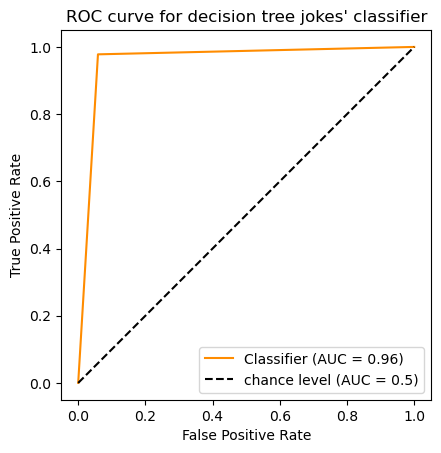

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    preds_tree,
    y_test,
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for decision tree jokes' classifier")
plt.legend()
plt.show()


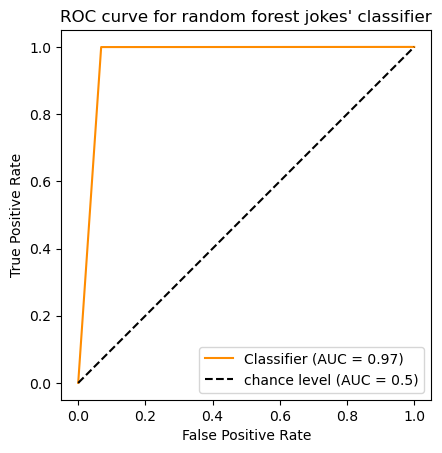

In [17]:
RocCurveDisplay.from_predictions(
    preds_forest,
    y_test,
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for random forest jokes' classifier")
plt.legend()
plt.show()

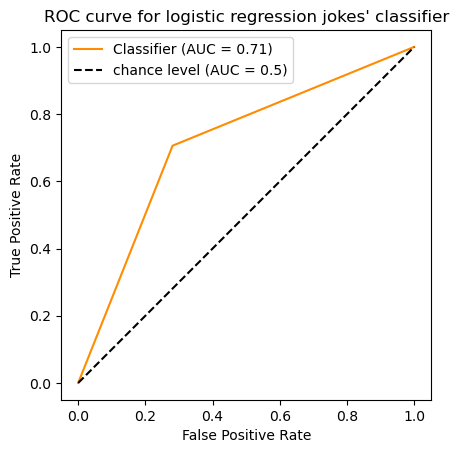

In [18]:
RocCurveDisplay.from_predictions(
    pred_logreg,
    y_test,
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve for logistic regression jokes' classifier")
plt.legend()
plt.show()

In [21]:
print('Logistic regression accuracy: ', best_logreg.score(X_test,y_test))
print('Decison tree accuracy: ', tree.score(X_test,y_test))
print('Random forest accuracy: ', forest.score(X_test,y_test))

Logistic regression accuracy:  0.712375
Decison tree accuracy:  0.958825
Random forest accuracy:  0.96315


In [22]:
from sklearn.metrics import f1_score, confusion_matrix 

In [26]:
f_logreg = f1_score(pred_logreg,y_test)
f_forest = f1_score(preds_forest,y_test)
f_tree = f1_score (preds_tree,y_test)

In [27]:
print('Logistic regression f1 score: ', f_logreg)
print('Decison tree f1 score: ', f_tree)
print('Random forest f1 score: ', f_forest)

Logistic regression f1 score:  0.7168696936138796
Decison tree f1 score:  0.9580007650133877
Random forest f1 score:  0.9617698931424422
